[View in Colaboratory](https://colab.research.google.com/github/RenanIOliveira/Compressao-de-Imagens-com-Fourier/blob/master/Compressao_de_imagens_Fourier.ipynb)

In [0]:

from google.colab import files
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm



#Transformada de Fourier Aplicada à Compressão de Imagens

##Introdução

>O objetivo desse trabalho é demonstrar como a transformada de Fourier pode ser aplicada ao processamento de imagens. Analisaremos como a transformada se aplica a imagens e seu significado quando aplicada desse modo. Assim como, usos comuns de filtros no spectro de fourier das imagens e aplicações para compressão.

###A transformada de Fourier
    
>A transformada de fourier é uma ferramenta matemática capaz de decompor uma função e expresá-la em forma de suas frequências componentes.
Isso é feito calculando a seguinte integral:
$$ĝ(f)=\int_{-\infty}^\infty{g(t).e^{-2i\pi f t}}dt$$

>Onde $ĝ(f)$ é a transformada de fourier de $g(t)$.
>Como na prática estaremos trabalhando com intervalos de tempo finitos nossa função será uma integral em um intervalo de tempo [t1,t2].
$$ĝ(f)=\int_{t1}^{t2}{g(t).e^{-2i\pi f t}}dt$$
>Vamos tomar um momento para entender o que essa integral significa. Primeiro vamos analisar o termo $e^{-2i\pi ft}$, se nos lembrarmos da identidade de Euler:$$e^{xi}=cos(x) + isen(x)$$
>Vemos que esse termo pode ser representado como um vetor no plano complexo.Em que $e^{0}$ corresponde ao mesmo vetor que $e^{2\pi}$, ou seja a componente x na fórmula corresponde à quanto o vetor no plano complexo girou(no sentido anti-horário) em torno da origem medido em radianos.Estamos represntando o vetor unitário no plano complexo deslocado $2\pi f$ radianos para cada instante de tempo t.
> entao podemos pensar no f como a frequencia com que estamos fazendo o vetor girar. para amostrarmos em cada instante de tempo t.
> podemos escrever a integral como um somatório discreto para ganharmos intuição sobre isso.
$$\sum_{k=1}^Ng(t_k)e^{2\pi ift}$$
>isso corresponde à amostrar a função g para os intervalos de 1 a N girar o vetor unitário $2\pi ft$ radianos e no sentido horário(inverter o sinal do expoente corresponde a girar o vetor no sentido horário) e e multiplicá-lo (estica-lo) por um valor corresponde a $g(t_k)$ a soma de todos os vetores correspondentes a todos os valores diferentes para k é igual a uma integral definida de k1 à N quando os intervalos entre $k_1,k_2,k_3,...,N$ se tornam infinitesimalmente pequenos.
> Seguindo essa definição podemos observar que todo sinal de frequencia f' possuirá uma transformada ĝ(f') distante de zero uma vez que todos os picos da função vão se sobrepor quando os vetores $\sum_{k=0}^Ng(f')e^{-2i\pi f' t}$ forem calculados, então a transformada possuirá vetores diferentes de zero apenas para valores f cujas frequencias f´ correspondentes estão presentes na função original.

>É preciso ressaltar que $ĝ(f)$ é um vetor no plano complexo portanto possui parte real e parte imaginária. A norma desse vetor nos fornece a amplitude do sinal no espectro de fourier daquela frequência(se relaciona com a amplitude da senoide no sinal original) e o angulo $\theta$ que o vetor faz com o eixo dos reais nos diz a fase dessa senóide.

>Na prática quando calculamos a transformada de uma função validamos a função $ĝ(f)$ para diferentes frequências de zero à [frequencia de Nyquist](https://pt.wikipedia.org/wiki/Teorema_da_amostragem_de_Nyquist%E2%80%93Shannon).
>dizemos que esse novo vetor que obtemos é a representação no espectro de Fourier da nossa função original.
>É importante perceber que de maneira semelhante podemos calcular a transformada inversa através do espectro de Fourier da função original. 


>Uma demonstração intuitiva dessa explicação pode ser encontrada [aqui](https://www.youtube.com/watch?v=spUNpyF58BY&t=7s).

>A aplicação da transformada é melhor compreendida na prática, então vamos definir uma função seno e calcular sua transforamada.
    


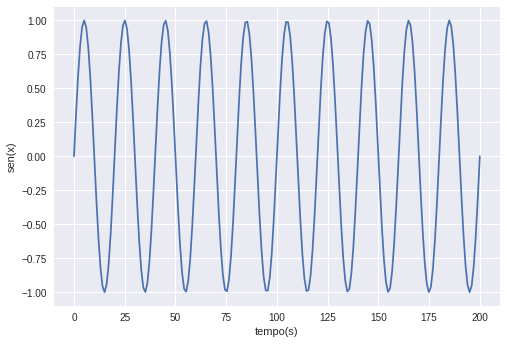

In [2]:

x1 = np.linspace(-10*np.pi, 10*np.pi, 200)
sen1 = np.sin(x1)
plt.plot(np.linspace(0,200,200), sen1)
plt.xlabel('tempo(s)')
plt.ylabel('sen(x)')
plt.show()


>Que fique claro que consideramos que cada amostragem foi feita em intervalos de 1s.Como nosso vetor x1 contém 200 amostragens. Estamos considerando um intervalo de 200 segundos.
    Assim a frequência da nossa onda é de 0.05 Hertz:
    
$$Freq=\frac{10ciclos}{200segundos}=0.05Hertz$$


>Agora vamos calcular a transformada de fourier da nossa função:

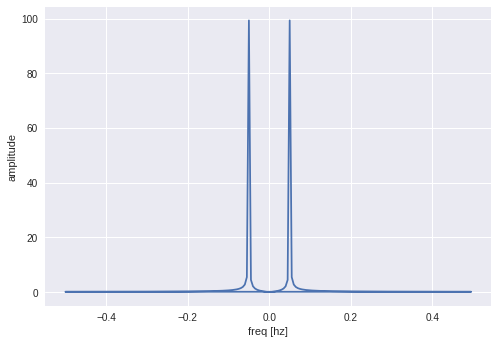

In [3]:
fourier_sen1 = np.fft.fft(sen1)
freq_fourier_x1=np.fft.fftfreq(len(sen1))
plt.plot(freq_fourier_x1, np.abs(fourier_sen1))
plt.xlabel('freq [hz]')
plt.ylabel('amplitude')
plt.show()

>Como vemos a transformada no domínio da frequência apresenta dos picos nos pontos -0,05Hz e +0,05Hz, isso nos diz que há apenas um sinal de 0,05 Hertz compondo o nosso sinal original.

>Agora vamos somar um sinal com 1.5 vezes a frequência e metade da amplitude ao nosso sinal original:

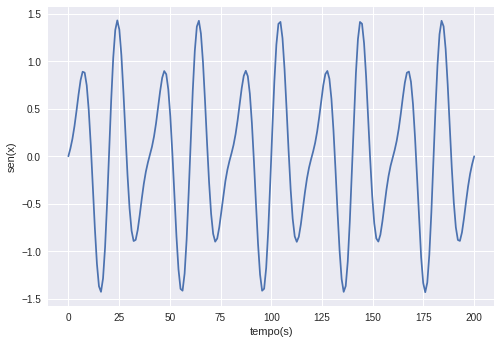

In [4]:
x2 = np.linspace(-15*np.pi, 15*np.pi, 200)
sen2 = (0.5)*np.sin(x2)
x3 = sen1+sen2
plt.plot(np.linspace(0,200,200), x3)
plt.xlabel('tempo(s)')
plt.ylabel('sen(x)')
plt.show()

>Note que agora o sinal se torna mas difícil de identificar, apesar de ser composto por apenas duas senóides simples.

>Vamos calcular a transformada:

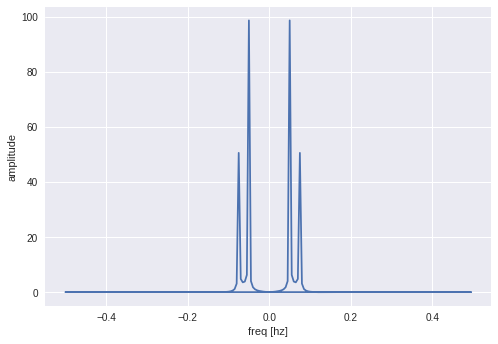

In [5]:
fourier_sen2 = np.fft.fft(x3)
freq_fourier_x3=np.fft.fftfreq(len(x3))
plt.plot(freq_fourier_x3, np.abs(fourier_sen2))
plt.xlabel('freq [hz]')
plt.ylabel('amplitude')
plt.show()

>Perceba que agora podemos ver quatro picos no espectro da transformada. Os dois picos mais altos são os mesmos do gráfico anterior e correspondem a nossa senóide original e como vimos estão 0,05 e -0,05 Hertz. Porém nesse gráfico existem mais dois picos que correspondem a nova senóide que somamos.
>Notamos que diferente do gráfico da função original, com a transformada em mãos, vemos facilmente que o sinal é composto pela sobreposição de duas frequências.

###Transformada Aplicada à Imagens 

> Nós definimos a transformada Fourier e explicamos o que ela representa quando aplicada à uma função. Mas como ela se aplica a imagens?

>Para entendermos como a transformada de fourier pode ser aplicada a imagens precisamos de três coisas.

>1. Entender como uma imagem pode ser vista como uma curva no espaço   
>2. Definir frequência espacial  
>3. Entender como fazer a transformada de uma matriz bidimensional



#### 1. Imagens como curvas no espaço 

>Para facilitar as explicações usaremos imagens que contém apenas tons de cinza. Porém os mesmos conceitos se aplicam a imagens em cores.

>Uma imagem não passa de um vetor 2D com números, uma imagem em preto e branco de 100x100 é uma matriz 100x100 contendo números onde cada valor está entre 0 e 255, e indica o quanto aquele pixel deverá "acender" na imagem. Sendo 255 correspondente a cor branca e 0 ao preto.
> Para vizualizarmos a matriz como uma curva podemos ver cada ponto como tendo coordenadas x,y e z, sendo x e y a posição do pixel na imagem e z a luminosidade dele. cada par de valores x,y está relacionado à um valor z. (isso implica que a imagem pode ser representada como uma função $f(x,y)$)

>Vejamos um exemplo:
>Vamos contruir uma imagem em de 100x100 pixels em que  cada linha corresponde a uma senoide e ver como ela é representada como uma curva no espaço.

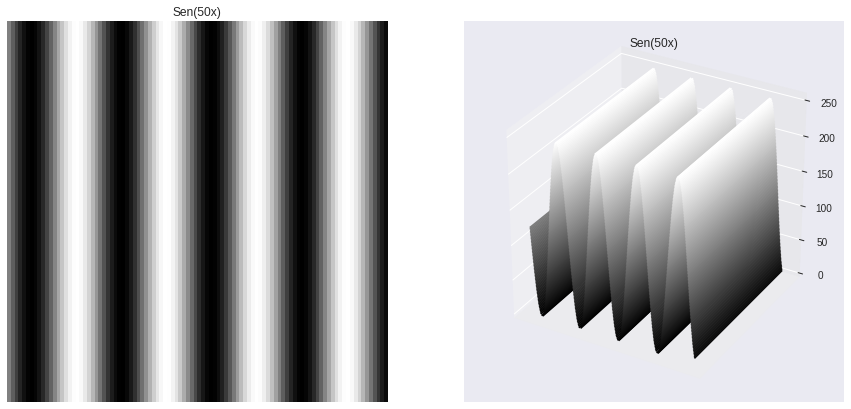

In [6]:
imagem_sen = np.zeros([100,100])

#gera uma senóide horizontal que varia de zero a 255
for x,row in enumerate(imagem_sen):
  for y,column in enumerate(row):
    imagem_sen[y][x]=124+(255/2)*np.sin(50*x)

#cria uma nova figure
plt.close()
fig = plt.figure(figsize=(15,7))

#insere imagem na figure
fig.add_subplot(121),plt.imshow(imagem_sen, cmap = 'gray')
plt.title('Sen(50x)'), plt.xticks([]), plt.yticks([])

#cria matrizes x e y para serem usadas na funcao de plot 3D
x = np.linspace(1, 100, 100)
y = np.linspace(1, 100, 100)
X, Y = np.meshgrid(x, y)

#insere a projeção 3D da imagem na figure
ax = fig.add_subplot(122, projection='3d')
ax.contour3D(X, Y, imagem_sen, 140, cmap='gray')
plt.title('Sen(50x)'), plt.xticks([]), plt.yticks([])
ax.set_zlim(0, 255.00)



  
plt.show()

Podemos ver a imagem representada como uma curva no espaço onde a cor branca corresponde a valores mais altos para z e a cor preta para valores mais próximos de zero.
Vejamos um exemplo com a sobreposicao de duas curvas:

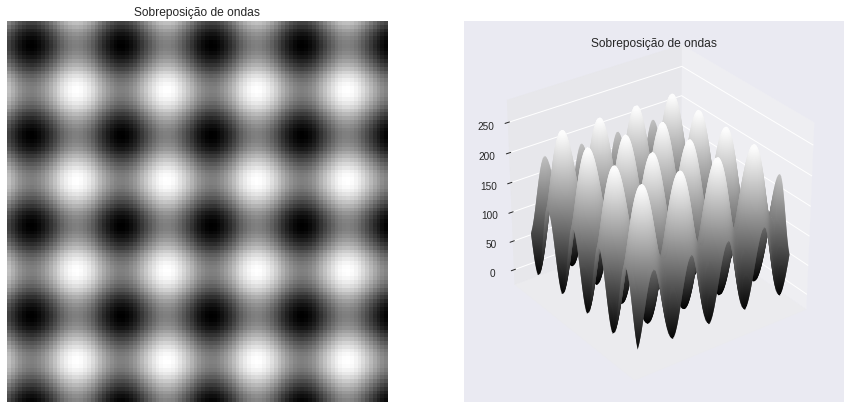

In [7]:
plt.switch_backend('agg')

#gera uma senóide vertical com metade da amplitude da anterior
imagem_sen2 = np.zeros([100,100])
for x,row in enumerate(imagem_sen2):
  for y,column in enumerate(row):
    imagem_sen2[y][x]=0.5*np.sin(50*y)

#soma as duas senóides
imagem_sen3 = (124+(255*imagem_sen2)+imagem_sen)/2

#cria uma nova figure
plt.close()
fig = plt.figure(figsize=(15,7))

#insere a imagem na figure
fig.add_subplot(121),plt.imshow(imagem_sen3, cmap = 'gray')
plt.title('Sobreposição de ondas'), plt.xticks([]), plt.yticks([])

#insere a projeção 3D da imagem na Figure
ax = fig.add_subplot(122, projection='3d')
ax.contour3D(X, Y, imagem_sen3, 180, cmap='gray')
plt.title('Sobreposição de ondas'), plt.xticks([]), plt.yticks([])
ax.set_zlim(-20, 280)

# Essa rotina apenas gira um pouco a projeção 3D
for angle in range(45,55):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

plt.show()


Do mesmo modo vemos que o gráfico tem picos em regiões claras e vales em regiões escuras. Qualquer imagem pode ser represntada desse modo, então fazer a transformada de fourier de uma imagem é apenas aplicar a transformada em um vetor 2D ao invés de um vetor de uma dimensão.

#### 2. Frequencia Espacial
>O conceito de Frequência espacial é bem simples. Quando nos referimos a frequência geralmente nos referimos a frequência temporal, que é dada em $\frac{ciclos}{segundo}$ do mesmo modo em uma imagem podemos ter uma onda estática naquele intervalo de espaço. Se temos um sinal que por 200 segundos varia 20 vezes sua frequência será 0.1 Hertz. De modo análogo podemos ter uma imagem que possui 200 pixels por linha e em cada linha possui uma senoide que completa 20 ciclos a frequencia dessa onda será $0.1\frac{ciclos}{pixel}$. A partir de agora quando nos referirmos a frequência estaremos nos referindo a esse tipo de frequência.

#### 3. Transformada de fourier de uma matriz bidimensional
>Vimos como uma imagem pode ser vista como uma curva no espaço, porém não discutimos como a transformada se aplica a uma matriz de duas dimensões. Suponha que tenhamos uma matriz A de duas dimensões. Para calcular a transformada de Fourier de A aplicamos a transformada em cada linha de A obtendo uma nova matriz A' e então aplicamos a transformada em cada coluna dessa nova matriz, o resultado é o espectro de Fourier da imagem original. A biblioteca numpy possui uma implementação pronta para realizar a transformada em uma matriz bidimensional e usaremos essa implementação aqui.

> vamos calcular as transformadas das duas imagens anteriores (a senóide horizontal e a sobreposição de duas senóides):

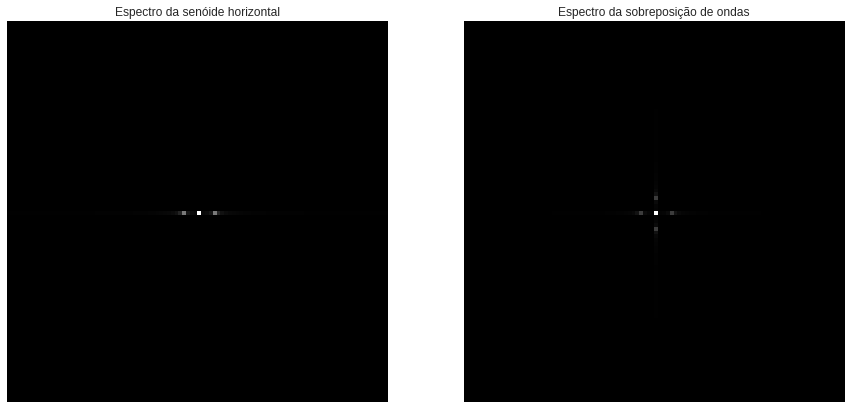

In [8]:
#usamos a função fft2 para calcular a transformada
# e usamos a função fftshift para deslocar a frequencia zero para o centro do espectro e melhorar a vizualização
fourier_imagem_sen=np.fft.fft2(imagem_sen)
fourier_imagem_sen3=np.fft.fft2(imagem_sen3)
fourier_imagem_sen_shift = np.fft.fftshift(fourier_imagem_sen)
fourier_imagem_sen3_shift = np.fft.fftshift(fourier_imagem_sen3)

#pegamos a amplitude dos vetores do espectro, lembre-se que são números complexos
fourier_imagem_sen_shift=np.abs(fourier_imagem_sen_shift)
fourier_imagem_sen3_shift=np.abs(fourier_imagem_sen3_shift)

#plotando o espectro de fourier da imagem
plt.close()
fig = plt.figure(figsize=(15,15))
fig.add_subplot(121),plt.imshow(fourier_imagem_sen_shift, cmap = 'gray')
plt.title('Espectro da senóide horizontal'), plt.xticks([]), plt.yticks([])

fig.add_subplot(122),plt.imshow(fourier_imagem_sen3_shift, cmap = 'gray')
plt.title('Espectro da sobreposição de ondas'), plt.xticks([]), plt.yticks([])

plt.show()


>O espectro é representado com a frequência zero no centro e as frequências mais altas mais próximas da borda da imagem.
>Perceba que o primeiro espectro nos diz que a imagem é formada por uma única onda horizontal o ponto branco no centro representa a frequência zero  os pontos laterais representam a frequência da onda e seu simétrico negativo. Já o espectro da direita nos diz que temos uma onda horizontal e uma vertical. 

>Vejamos agora como seria o espectro de uma senóide com direção diagonal:

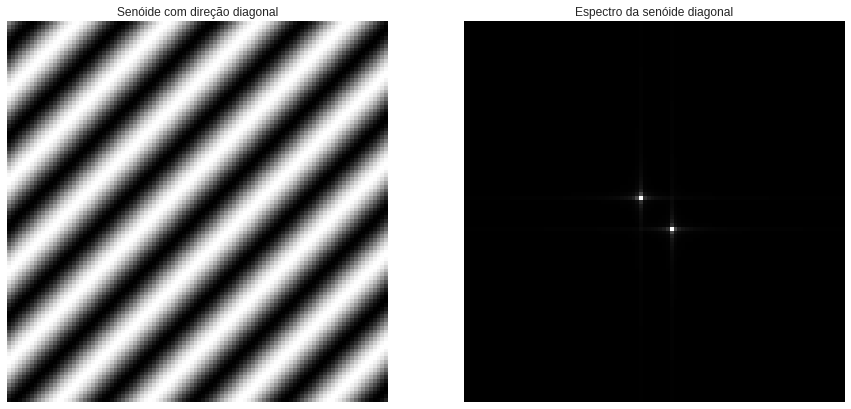

In [9]:
imagem_sen4 = np.zeros([100,100])
#gera uma senóide com direção diagonal aos eixos da imagem
for x,row in enumerate(imagem_sen4):
  for y,column in enumerate(row):
    imagem_sen4[y][x]=np.sin(50*(y+x))
    
# e usamos a função fftshift para deslocar a frequencia zero para o centro do espectro e melhorar a vizualização
fourier_imagem_sen4=np.fft.fft2(imagem_sen4)
fourier_imagem_sen4_shift = np.fft.fftshift(fourier_imagem_sen4)
#pegamos a amplitude dos vetores do espectro, lembre-se que são números complexos
fourier_imagem_sen4_shift=np.abs(fourier_imagem_sen4_shift)

    
    
    
plt.close()
fig = plt.figure(figsize=(15,15))
fig.add_subplot(121),plt.imshow(imagem_sen4, cmap = 'gray')
plt.title('Senóide com direção diagonal'), plt.xticks([]), plt.yticks([])

fig.add_subplot(122),plt.imshow(fourier_imagem_sen4_shift, cmap = 'gray')
plt.title('Espectro da senóide diagonal'), plt.xticks([]), plt.yticks([])

plt.show()

>Agora temos dois pontos no espectro da imagem porém eles estão alinhados diagonalmente com o centro do espectro. É importante entender o que isso significa. Se amostrássemos nossa imagem no sentido horizontal obteríamos apenas uma senóide com certa frequência relacionada a quanto os pontos no espectro se distanciam do centro horizontalmente, e se amostrássemos verticalmente obteríamos outra senóide com certa frequência e a distancia vertical dos pontos ao centro repressenta essa frequência. Basicamente desse modo o espectro indica a direção da senóide e não somente sua frequência.

>É preciso ressaltar que estamos analisando apenas a amplitude das diferentes frequências presentes no espectro porém a transformada nos da um vetor complexo e para reconstruir a imagem original precisamos também da fase de cada onda que é representada pelo ângulo que nossos vetores ĝ(f) fazem com o eixo dos reais.

### Resumindo



*   A transformada de fourier é uma ferramenta matemática que converte funções para o domínio da frequência.
*   Qualquer função pode ser descrita por uma soma de senos e cossenos.
*   Imagens podem ser vistas como funções de duas variáveis, descrevendo assim uma curva no espaço.
*   Então qualquer imagem pode ser descrita por uma soma de senos e cossenos, tomando as devidas frequência, fase e direção.
*   Ao calcularmos a transformada de Fourier de uma imagem, temos o espectro de fourier dela, que corresponde a uma representação de todas as ondas que se somadas formam nossa imagem.



##Compressão de imagens utilizando a transformada de Fourier

>Agora veremos como podemos usar a transformada de fourier para comprimir imagens. Faremos isso alterando o espectro de fourier da imagem.

>Código usado para carregar as imagens: 



In [12]:

#carrega as imagens e salva (chamar apenas 1 vez)
#usar nome de imagem1
def upload_files():
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

upload_files()
!ls


Saving imagem1.jpg to imagem1.jpg
datalab  imagem1.jpg


>Primeiro vamos olhar para o espectro de fourier da nossa imagem:

In [0]:
# carrega a imagem como uma matriz em escala de cinza
img = cv2.imread('imagem1.jpg',0)
#executa a transformada e coloca a frequencia zero no centro
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
#calulamos o log do espectro pois a transformada da imagem possui coeficientes altos demais para exibirmos como imagem
magnitude_spectrum = 20*np.log(np.abs(fshift))




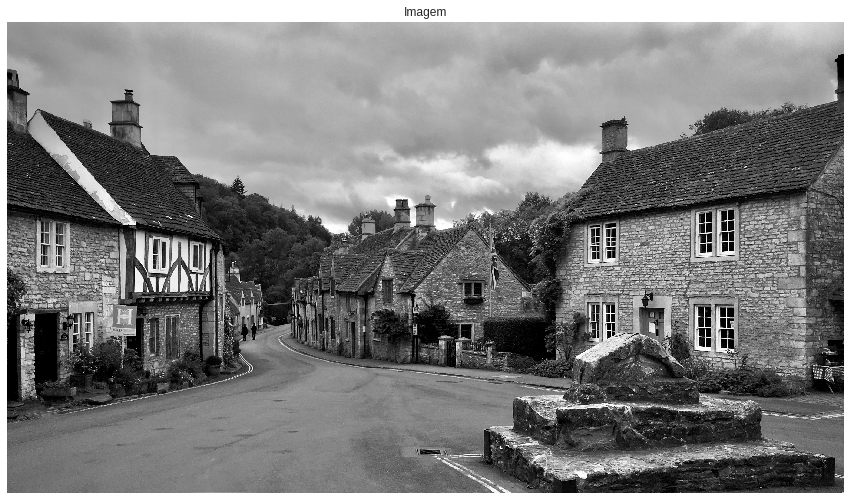

In [14]:
#criando uma nova figure
plt.close()
plt.subplots(figsize=(15,15))
#plotando a imagem original
plt.subplot(111),plt.imshow(img, cmap = 'gray')
plt.title('Imagem'), plt.xticks([]), plt.yticks([])

plt.show()

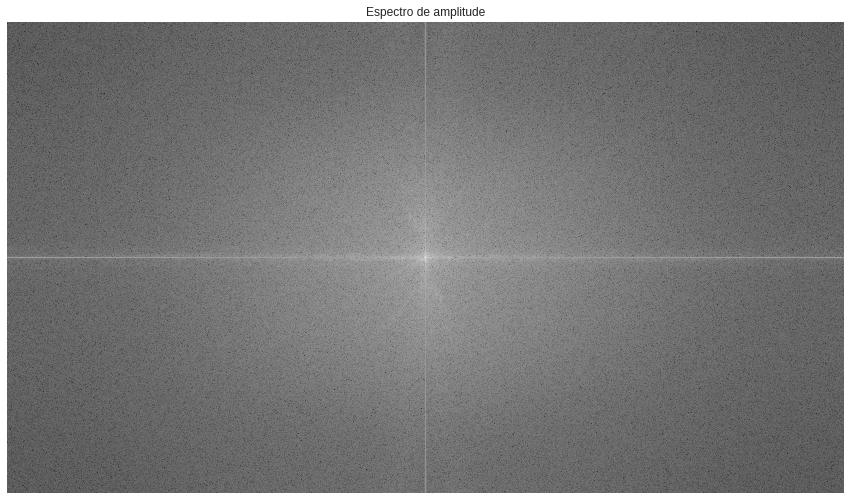

In [15]:
#plotando  a transformada da imagem
plt.subplots(figsize=(15,15))
plt.subplot(111),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Espectro de amplitude'), plt.xticks([]), plt.yticks([])
plt.show()

> Notamos que o espectro da imagem é muito mais complexo que os que analisamos antes, ainda sim a sobreposição de todas as ondas descritas no espectro forma a imagem orginal.
>Percebemos também que o espectro possui componentes de baixa frequência com amplitude mais alta que as componentes de alta frequência. Podemos perceber isso pois o centro do espectro é muito mais claro que as beiradas do espectro.

>Vamos comprovar isso removendo parte das componentes de alta frequência da imagem através de um filtro:

In [0]:
# adquirindo dimensões da imagem
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)

#criamos uma mascara que vai remover 75% do espectro correspondente as frequências mais altas
mask = np.zeros((rows,cols),np.int8)
n1 = int(crow/2)
n2 = int(ccol/2)
mask[crow-n1:crow+n1,ccol-n2:ccol+n2]=1;


#aplicando a mascara que zera todos os componentes que não estão próximos ao centro do espectro
changed_fshift1 = fshift*mask;


#faz a transformada inversa do espectro após aplicado o filtro
ifshift1 = np.fft.ifftshift(changed_fshift1)
out1 = np.abs(np.fft.ifft2(ifshift1))

#troca os valores iguais a zero por nan(not a number) apenas para calcular o log (esses valores serão ignorados no calculo do logaritmo)
changed_fshift1= np.abs(changed_fshift1)
changed_fshift1[changed_fshift1==0] = np.nan
#calula o log para exibir o espectro
new_spectrum1 = (20*np.log(np.abs(changed_fshift1)))




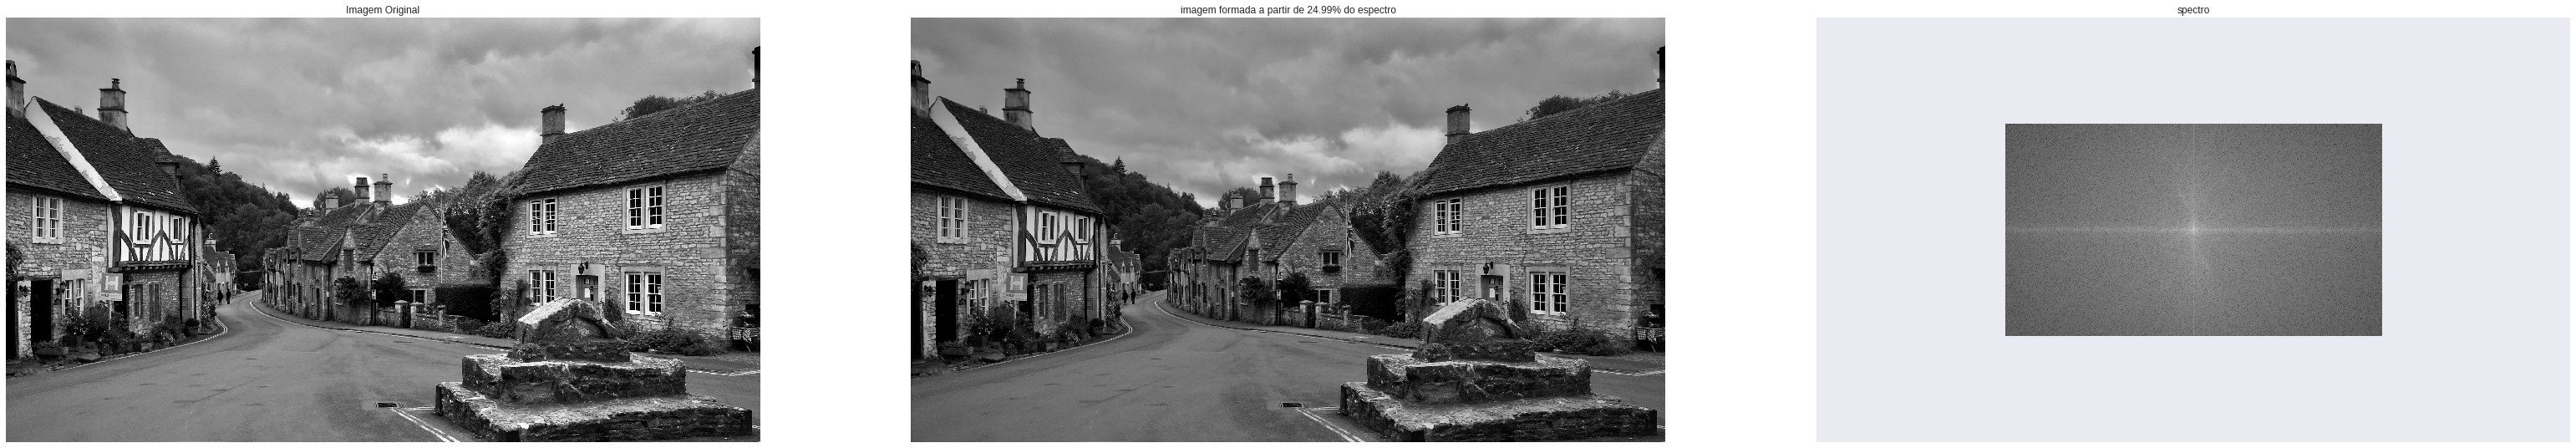

In [17]:
plt.close()
plt.subplots(figsize=(55,35))

#plotando a imagem original
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Imagem Original'), plt.xticks([]), plt.yticks([])

#plotando imagem após a aplicação do filtro
plt.subplot(132),plt.imshow(np.abs(out1), cmap="gray")
plt.title(("imagem formada a partir de %0.2f%% do espectro"%(crow*ccol/(rows*cols)*100))),plt.xticks([]),plt.yticks([])

#plotando espectro após a aplicação do filtro
plt.subplot(133),plt.imshow(new_spectrum1, cmap = 'gray')
plt.title('spectro'), plt.xticks([]), plt.yticks([])

plt.show()

>Observe que apesar de termos removido 75% do espectro há uma perda mínima da qualidade da imagem, isso ocorre porque removemos as componentes de frequência mais alta que possuem amplitude mais baixa e contribuem menos para a construção da imagem(Além de contribuírem para bordas e detalhes menores).

>Removemos todos os componentes de alta frequência no exemplo anterior, e fizemos isso porque notamos que eles possuíam amplitude mais baixa. Então um jeito sensato de comprimir a imagem é remover todas as componentes com amplitude menor que certo patamar (em qualquer frequência).

>Criaremos diferentes patamares para usarmos diferentes níveis de compressão:

In [0]:
#remover componentes de baixa amplitude do espectro de frequencia


fshift2=fshift
#pegamos as amplitudes
amp_fshift2=np.abs(fshift2)

#pegaremos a maior amplitude presente na nossa transformada
maior = np.amax(np.abs(fshift2))

#cria as variáveis correspondentes aos diferentes patamares(eliminaremos qualquer valor menor que eles)
p1 = 0.01*0.001*maior
p2 = 0.01*0.005*maior
p3 = 0.01*0.01*maior



#removemos do espectro todos os valores menores que p1
new_spectrum2=np.copy(fshift2)
new_spectrum2[amp_fshift2<p1]=0
#contamos quantos elementos permaneceram inalterados
cont1=np.sum(new_spectrum2 == fshift2)
#calculamos a porcentagem da imagem que permanece inalterada
cont1=(cont1/(rows*cols))*100


#removemos do espectro todos os valores menores que p2
new_spectrum3=np.copy(fshift2)
new_spectrum3[amp_fshift2<p2]=0
#contamos quantos elementos permaneceram inalterados
cont2=np.sum(new_spectrum3 == fshift2)
# calculamos a porcentagem da imagem que permanece inalterada
cont2=(cont2/(rows*cols))*100


# #removemos do espectro todos os valores menores que p1
new_spectrum4=np.copy(fshift2)
new_spectrum4[amp_fshift2<p3]=0
# #contamos quantos elementos permaneceram inalterados
cont3=np.sum(new_spectrum4 == fshift2)
#calculamos a porcentagem da imagem que permanece inalterada
cont3=(cont3/(rows*cols))*100


#desfazemos a transformada para ver as imagens após a compressão
changed_image2 = np.fft.ifft2(np.fft.ifftshift(new_spectrum2))
changed_image3 = np.fft.ifft2(np.fft.ifftshift(new_spectrum3))
changed_image4 = np.fft.ifft2(np.fft.ifftshift(new_spectrum4))


#trocamos todos os zeros por nan para calcular o log
new_spectrum2[np.abs(new_spectrum2)==0]=np.nan
new_spectrum3[np.abs(new_spectrum3)==0]=np.nan
new_spectrum4[np.abs(new_spectrum4)==0]=np.nan

#calculamos o logaritmo dos espectros para exibi-los
log_new_spectrum2=20*np.log(np.abs(new_spectrum2))
log_new_spectrum3=20*np.log(np.abs(new_spectrum3))
log_new_spectrum4=20*np.log(np.abs(new_spectrum4))


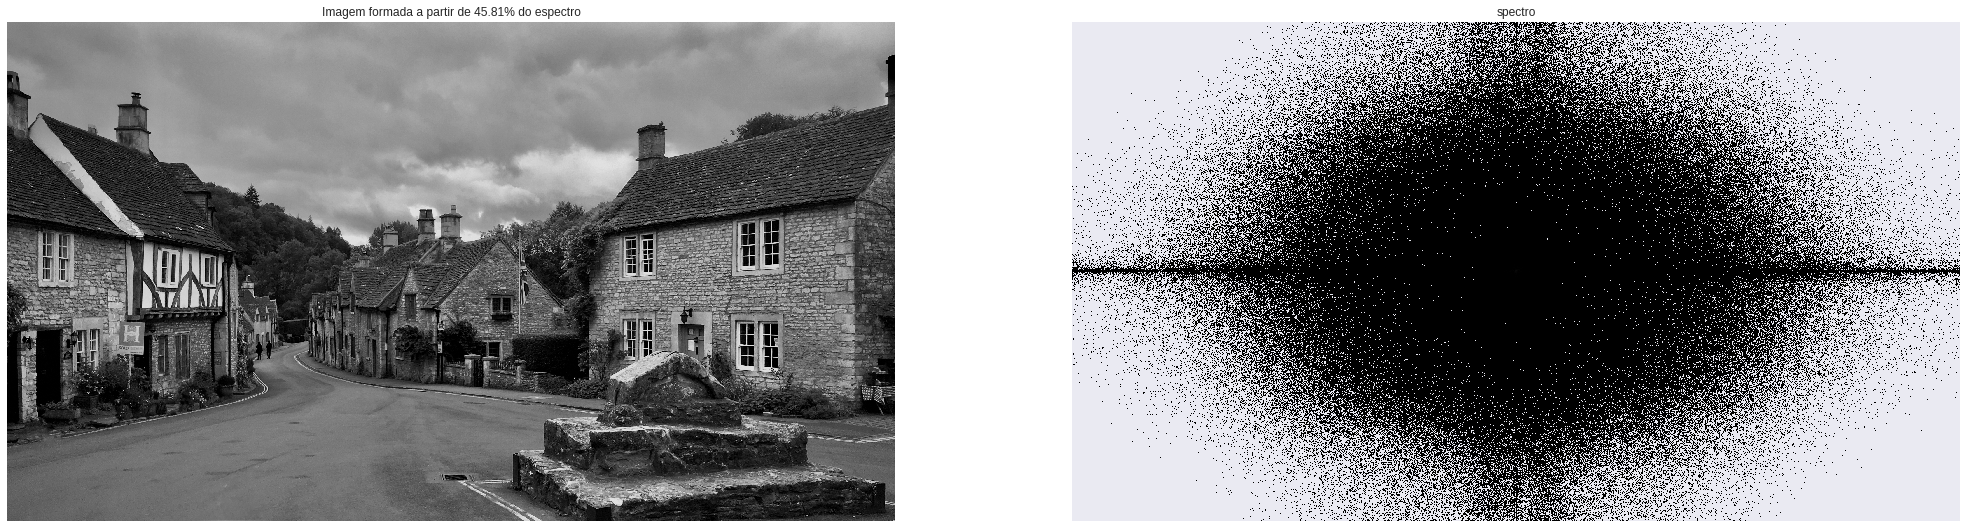

In [19]:
#plotando a primeira imagem e seu espectro

plt.close()
plt.subplots(figsize=(35,35))

plt.subplot(121),plt.imshow(np.abs(changed_image2), cmap = 'gray')
plt.title("Imagem formada a partir de %0.2f%% do espectro"%(cont1)), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(np.abs(new_spectrum2), cmap="gray")
plt.title("spectro"),plt.xticks([]), plt.yticks([])

plt.show()


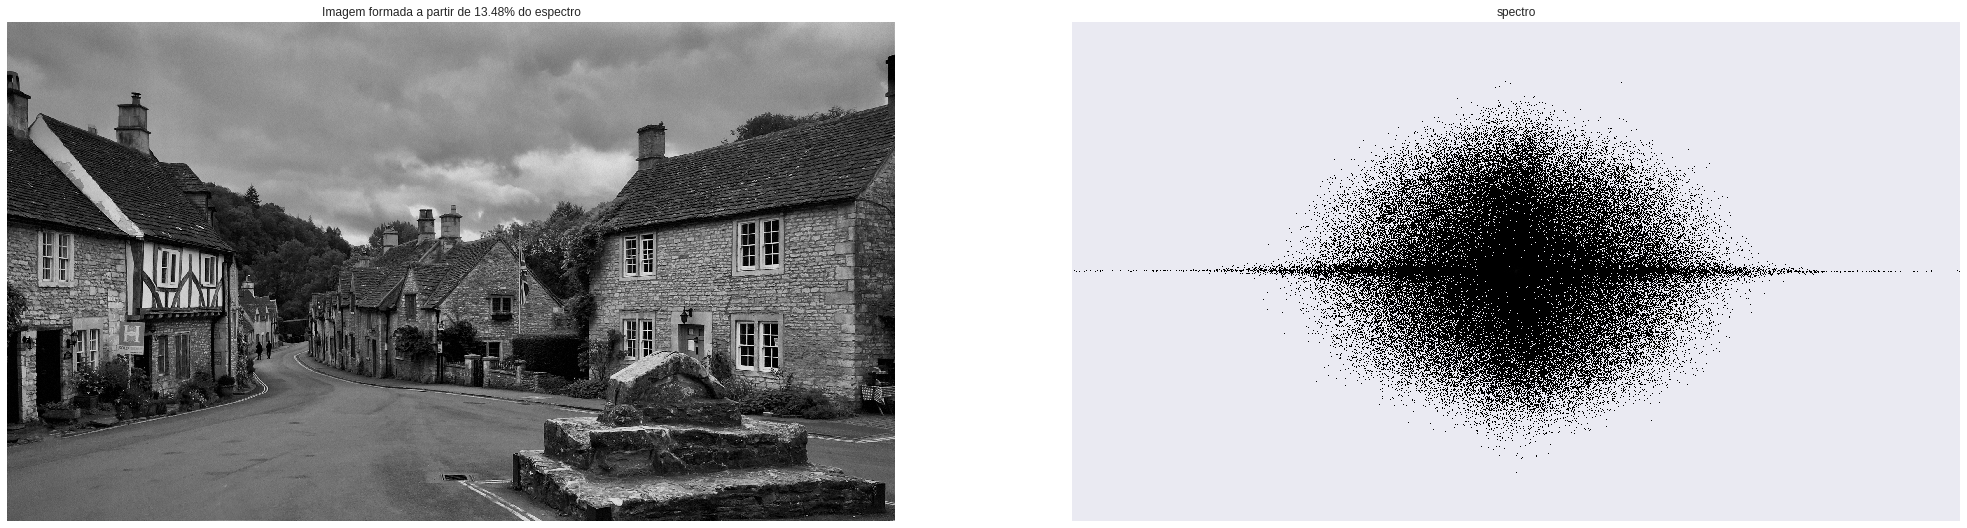

In [20]:
#plotando a segunda imagem e seu espectro

plt.close()
plt.subplots(figsize=(35,35))

plt.subplot(121),plt.imshow(np.abs(changed_image3), cmap = 'gray')
plt.title("Imagem formada a partir de %0.2f%% do espectro"%(cont2)), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(np.abs(new_spectrum3), cmap="gray")
plt.title("spectro"),plt.xticks([]), plt.yticks([])


plt.show()

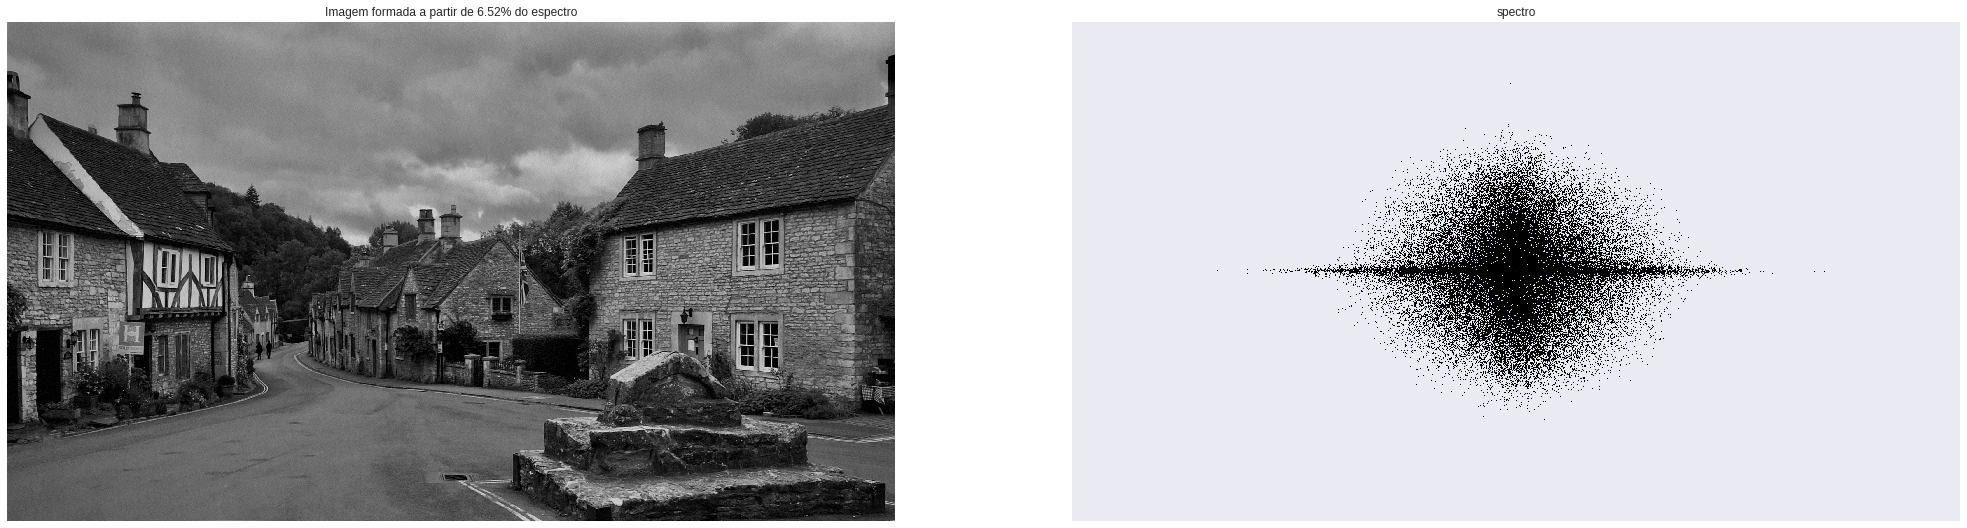

In [21]:
#plotando a terceira imagem e seu espectro

plt.close()
plt.subplots(figsize=(35,35))

plt.subplot(121),plt.imshow(np.abs(changed_image4), cmap = 'gray')
plt.title("Imagem formada a partir de %0.2f%% do espectro"%(cont3)), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(np.abs(new_spectrum4), cmap="gray")
plt.title("spectro"),plt.xticks([]), plt.yticks([])

plt.show()

>Perceba que no último espectro sobram apenas pontos esparsos próximos ao centro do espectro (os pontos em preto) eles compões apenas uma porcentagem mínima(ver acima da imagem) do espectro da imagem, ainda sim a perda de qualidade é mínima.

>Por último vamos usar um patamar ainda mais alto para mostrar que se tentarmos comprimir demais a imagem veremos perdas significativas na qualidade.

In [0]:
#definimos o patamar 
p4 = 0.01*0.05*maior


#removemos do espectro todos os valores menores que p4
new_spectrum5=np.copy(fshift2)
new_spectrum5[amp_fshift2<p4]=0
#contamos quantos elementos permaneceram inalterados
cont4=np.sum(new_spectrum5 == fshift2)
#calculamos a porcentagem da imagem que permanece inalterada
cont4=(cont4/(rows*cols))*100

#desfazemos a transformada para ver as imagens após a compressão
changed_image5 = np.fft.ifft2(np.fft.ifftshift(new_spectrum5))

#trocamos todos os zeros por nan para calcular o log
new_spectrum5[np.abs(new_spectrum5)==0]=np.nan

#calculamos o logaritmo dos espectros para exibi-los
log_new_spectrum5=20*np.log(np.abs(new_spectrum5))



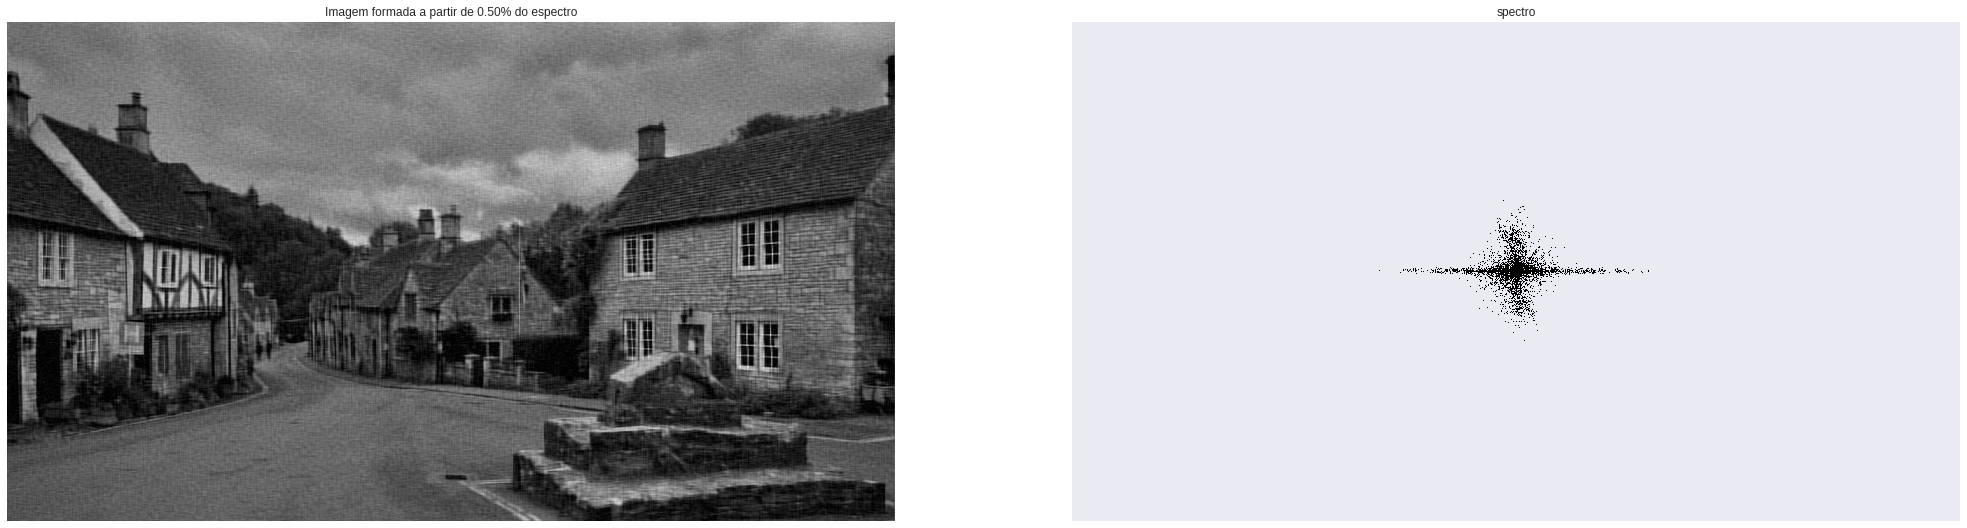

In [23]:
#plotando a imagem e seu espectro

plt.close()
plt.subplots(figsize=(35,35))

plt.subplot(121),plt.imshow(np.abs(changed_image5), cmap = 'gray')
plt.title("Imagem formada a partir de %0.2f%% do espectro"%(cont4)), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(np.abs(new_spectrum5), cmap="gray")
plt.title("spectro"),plt.xticks([]), plt.yticks([])

plt.show()

>Com esse nível de compressão conseguimos ver perdas significativas de qualidade.

###Considerações finais

>   Vimos que podemos remover uma parte significativa do espectro das imagens e ainda sim elas serão quase indistinguíveis das originais, porém devemos pensar em como guardar essas imagens. Como o espetro da imagem comprimida terá em sua maioria zeros (entretanto no espectro temos números complexos que precisam de mais espaço quando armazenados que os números reais da imagem original), não precisamos guardar todos os valores, ao invés de guardar todos os zeros podemos codificar as cadeias de zero economizando muito espaço. Além disso é importante notar que o espectro é simétrico horizontalmente e verticalmente, desse modo precisamos guardar apenas 1/4 dele para que seja possível o reconstruir.

>Essa técnica é dependente do quão esparso é o espectro da imagem, isto é se as frequências presentes no espectro têm muitas componentes com amplitudes altas é mais díficil comprimir a imagem, porém se o espectro possui várias componentes com amplitudes próximas a zero é possível conseguir bons níveis de compressão. Imagens que contém diferentes texturas como grama são menos compressíveis por essa razão.

>Os conceitos demonstrados aqui são aplicáveis a imagens coloridas. Em imagens com três canais RGB por exemplo, basta que se execute essas operações para cada canal em separado. e então guarde o espectro comprimido de cada canal. Podendo assim reconstruir a imagem, desfazendo a trasformada e unindo os canais novamente.




####Referências


*   http://www.thefouriertransform.com/
*   https://see.stanford.edu/Course/EE261
*   http://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm
*   https://www.youtube.com/watch?v=spUNpyF58BY
*   https://en.wikipedia.org/wiki/Fourier_transform
*   https://pt.wikipedia.org/wiki/Teorema_da_amostragem_de_Nyquist%E2%80%93Shannon



>**Autor: Renan I. de Oliveira**

>**email: renanignoliveira@gmail.com** 
